In [1]:
# On import
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# On télécharge notre fichier CIF
with MPRester("3434NTJ0Daan9bDUnO") as m:
    structure = m.get_bandstructure_by_material_id("mp-7914")

Caractéristiques de la bande interdite :

Bande directe : False
Energie : 3.9788000000000006 eV
Transition : \Gamma-F


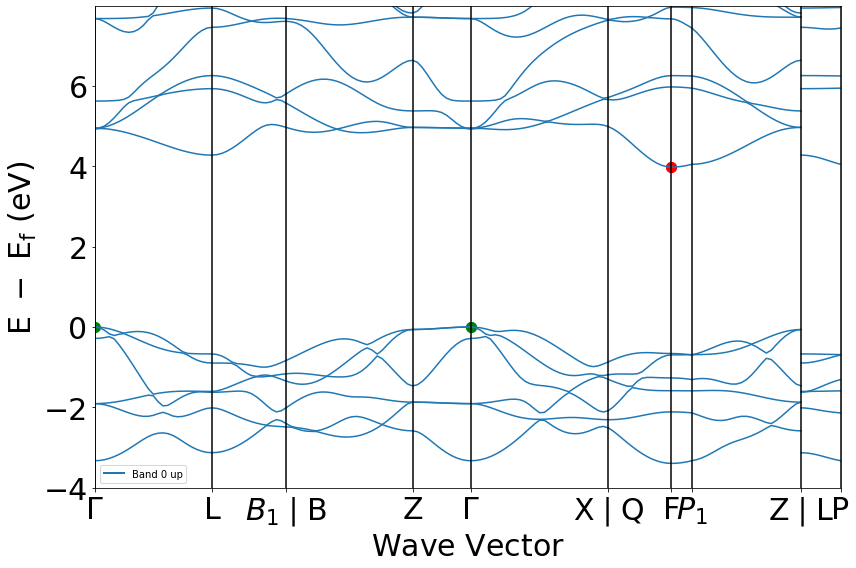

In [3]:
# On détermine la bande interdite 

bandes = BSPlotter(structure)
bandes.get_plot(vbm_cbm_marker=True)

band_gap = structure.get_band_gap()
print("Caractéristiques de la bande interdite :\n")
print("Bande directe :", band_gap["direct"])
print("Energie :", band_gap["energy"], "eV")
print("Transition :", band_gap["transition"])


In [13]:
# On détermine la direction dans laquelle la dernière (première) bande de valence (conduction) 
# présente le plus et le moins de dispersion.


# On cherche d'abord la dernière bande de valence et la première de conduction
valence = structure.get_vbm()
conduction = structure.get_cbm()
print(valence.get("band_index"))
print(conduction.get("band_index"))
print("")
print("On voit donc que les bandes 13 et 14 ont la grande énergie de la bande de valence et que la bande 15 a la petite énergie de la bande de conduction")

defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})

On voit donc que les bandes 13 et 14 ont la grande énergie de la bande de valence et que la bande 15 a la petite énergie de la bande de conduction


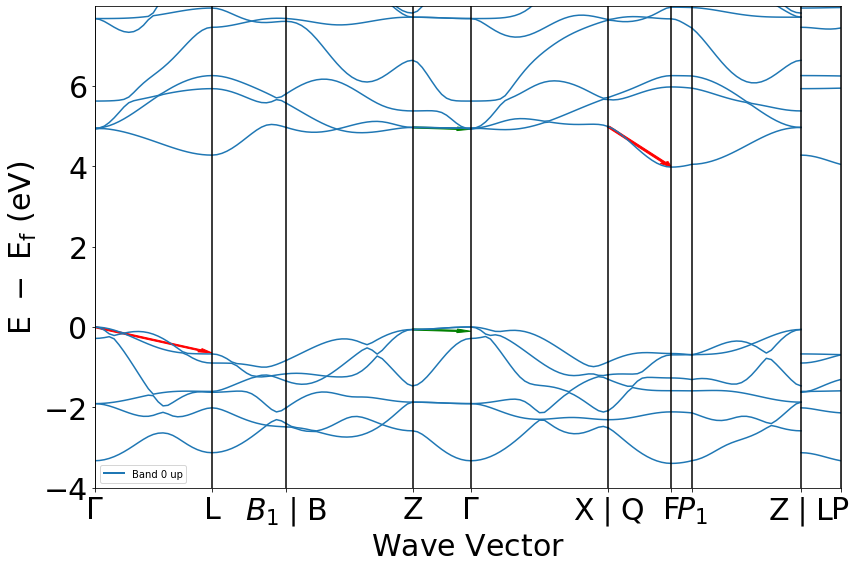

In [41]:
# On va donc calculer les directions de dispersion de la dernière bande de valence et de la première bande de conduction
# On doit trouver la pente maximale et minimale entre les branches

data = bandes.bs_plot_data()
X = data.get('ticks').get('distance')
Y = data.get('energy')
X = np.array([X[0],X[1],X[3],X[4],X[6],X[8],X[9],X[11],X[13],X[14]])

distance = np.zeros(9)
d_conduction = np.zeros(9)
d_valence = np.zeros(9)
pente_conduction = np.zeros(9)
pente_valence = np.zeros(9)

for i in range(9):
    distance[i] = X[i+1] - X[i]
    
for i in range(9):
    d_valence[i] =Y.get('1')[i][14][-1] - Y.get('1')[i][14][0]
    d_conduction[i] =Y.get('1')[i][15][-1] - Y.get('1')[i][15][0]
    
for i in range (9):
    pente_conduction[i] = d_conduction[i]/distance[i]
    pente_valence[i] = d_valence[i]/distance[i]

# Pentes max et min :

max_valence = np.max(abs(mv))
min_valence = np.min(abs(mv)) 
max_conduction = np.max(abs(mc))
min_conduction = np.min(abs(mc))

# On va ploter les flèches :
bandes.get_plot()
plt.arrow(X[5], (Y.get('1')[5][15])[0], distance[5], d_conduction[5], width = 0.03, length_includes_head=True, color='r')
plt.arrow(X[3], (Y.get('1')[3][15])[0], distance[3], d_conduction[3], width = 0.03, length_includes_head=True, color='g')

plt.arrow(X[0], (Y.get('1')[0][14])[0], distance[0], d_conduction[0], width = 0.03, length_includes_head=True, color='r')
plt.arrow(X[3], (Y.get('1')[3][14])[0], distance[3], d_conduction[3], width = 0.03, length_includes_head=True, color='g')

plt.show()



In [44]:
print("bande de valence: \n")
print("Plus grande pente et donc plus grande dispersion : ", max_valence)
print("Plus petite pente et donc plus petite dispersion :",min_valence,'\n\n')
print("bande de conduction : \n")
print("Plus grande pente et donc plus grande dispersion : ", max_conduction)
print("Plus petite pente et donc plus petite dispersion :",min_conduction)


bande de valence: 

Plus grande pente et donc plus grande dispersion :  0.6428197546038263
Plus petite pente et donc plus petite dispersion : 0.04488031497720945 


bande de conduction : 

Plus grande pente et donc plus grande dispersion :  1.625939146228944
Plus petite pente et donc plus petite dispersion : 0.00024173944370819026
